In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from bs4 import BeautifulSoup
import requests
import re
def facebook_login(mail, pwd):
    session = requests.Session()
    r = session.get('https://www.facebook.com/', allow_redirects=False)
    soup = BeautifulSoup(r.text)
    action_url = soup.find('form', id='login_form')['action']
    inputs = soup.find('form', id='login_form').findAll('input', {'type': ['hidden', 'submit']})
    post_data = {input.get('name'): input.get('value')  for input in inputs}
    post_data['email'] = c.montoro@campus.unimib.it
    post_data['pass'] = "Curcuma94!"
    scripts = soup.findAll('script')
    scripts_string = '/n/'.join([script.text for script in scripts])
    datr_search = re.search('\["_js_datr","([^"]*)"', scripts_string, re.DOTALL)
    if datr_search:
        datr = datr_search.group(1)
        cookies = {'_js_datr' : datr}
    else:
        return False
    return session.post(action_url, data=post_data, cookies=cookies, allow_redirects=False)

In [ ]:
df= pd.read_excel("/content/TARGET_IVECO_3.0_AN.xlsx")

In [ ]:
df['IR%']=df['Interazioni con il post']/df['Impression']

In [ ]:
if "country" in list(set(df.columns)):
  df['Country']=df['country'].copy()


df['Country']=df['Country'].str.replace('BL','BE')
df['Country']=df['Country'].str.replace('BE FR','BE')
df['Country']=df['Country'].str.replace('BE NL','BE')
if "placement" in list(set(df.columns)):
  df['placement']=df['placement'].str.replace('IGStory','IG')
  df['placement']=df['placement'].str.replace('IGstory','IG')
  df['placement']=df['placement'].str.replace('FBIG','FB')
if "formato" in list(set(df.columns)):
  df['Tipologia']=df['formato']
if "placement" in list(set(df.columns)):
  df['Channel']=df['placement']



In [ ]:
df['Country']=df['Country'].astype(str)
df['Tipologia']=df['Tipologia'].astype(str)

df=df.loc[df['Country']!="nan"]
df=df.loc[df['Tipologia']!="nan"]



df.loc[df.Tipologia != 'Static', 'Tipologia']='Video'  

df['Obiettivo']=df['Obiettivo'].str.replace("OUTCOME_AWARENESS", 'REACH')

In [ ]:
list(set(df['placement']))

['FB', 'IG']

In [ ]:
list(set(df['Tipologia']))

['Static', 'Video']

In [ ]:
#df=df[df.Obiettivo!='REACH']

In [ ]:
list(set(df['Obiettivo']))

['VIDEO_VIEWS', 'REACH', 'POST_ENGAGEMENT']

In [ ]:
list(set(df.Country))

['DE', 'FR', 'UK', 'PL', 'IT', 'BE', 'ES']

In [ ]:
#from datetime import datetime

#df['Open'] = pd.to_datetime(df['Open']#, format="%d-%m-%Y"  )
#df['Close'] = pd.to_datetime(df['Close']#, format="%d-%m-%Y")


#df['Giorni ON']= df['Close']-df['Open'] 


#df['Giorni ON']=df['Giorni ON'].astype(str).str.replace(" days","")
#df['Giorni ON']=df['Giorni ON'].astype(int)

In [ ]:
df['CPM']= (df['Importo speso (EUR)']/df['Impression'])*1000

In [ ]:
#df[df['feed/dark']=='post']
#df_original=df.copy()
#df_original['budget medio']=df_original.groupby(['anno mese'])['Importo speso (EUR)'].transform('mean')
#df_original['CPM medio']=df_original.groupby(['anno mese'])['CPM'].transform('mean')

In [ ]:
df.columns

Index(['obj.', 'mese', 'topic', 'formato', 'placement', 'country',
       'Nome del gruppo di inserzioni', 'Nome dell'inserzione', 'Obiettivo',
       'Nome della campagna', 'Piattaforma', 'Stato di pubblicazione',
       'Livello di pubblicazione', 'Tipo di risultato', 'Risultati',
       'Copertura', 'Impression', 'Costo per risultato', 'Importo speso (EUR)',
       'Clic unici sul link', 'Visualizzazioni della pagina di destinazione',
       'Clic sul link',
       'Costo per visualizzazione della pagina di destinazione',
       'Interazioni con il post', 'Riproduzioni del video di 3 secondi',
       'Riproduzioni del video al 25%', 'Riproduzioni del video al 50%',
       'Riproduzioni del video al 75%', 'Riproduzioni del video al 95%',
       'Riproduzioni del video al 100%', 'Reazioni ai post',
       'Condivisioni dei post', 'Commenti ai post', '"Mi piace" sulla Pagina',
       'Clic (tutti)', 'Inizio dei report', 'Fine dei report', 'IR%',
       'Country', 'Tipologia', 'Channel'

Fit the distribution of impressions


In [ ]:
from scipy.stats import *
import matplotlib.pyplot as plt
def fit_and_plot(dist, column):
    params = dist.fit(column)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    x = np.linspace(0, 80, 80)
    _, ax = plt.subplots(1, 1)
    plt.hist(column, bins = 80, range=(0, 80))
    ax2 = ax.twinx()
    ax2.plot(x, dist.pdf(x, loc=loc, scale=scale, *arg), '-', color = "r", lw=2)
    plt.show()
    return dist, loc, scale, arg

Text(0, 0.5, 'Frequency')

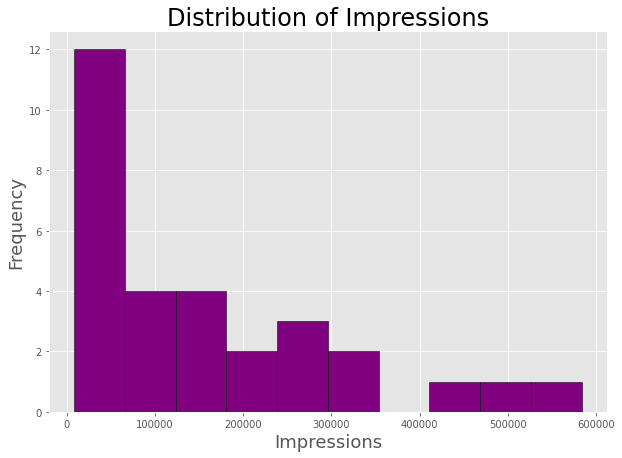

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# histogram of the height
df.loc[df['Obiettivo']=='REACH'].Impression.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Impressions', size=24)
plt.xlabel('Impressions', size=18)
plt.ylabel('Frequency', size=18)


Text(0, 0.5, 'Frequency')

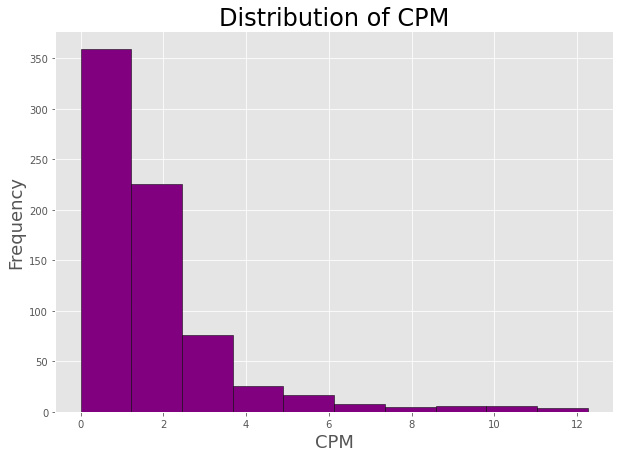

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# histogram of the height
df.CPM.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of CPM', size=24)
plt.xlabel('CPM', size=18)
plt.ylabel('Frequency', size=18)



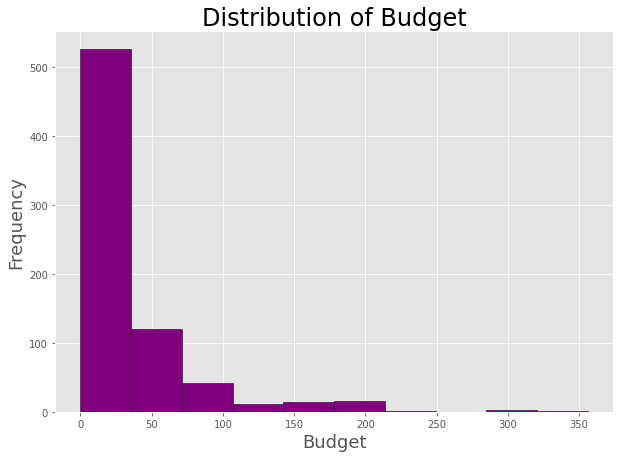

In [ ]:
# histogram of the weight
df['Importo speso (EUR)'].plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Budget', size=24)
plt.xlabel('Budget', size=18)
plt.ylabel('Frequency', size=18);

In [ ]:
df['Importo speso (EUR)'].describe()

count    733.000000
mean      29.282976
std       47.767039
min        0.000000
25%        0.170000
50%        4.580000
75%       41.940000
max      356.030000
Name: Importo speso (EUR), dtype: float64

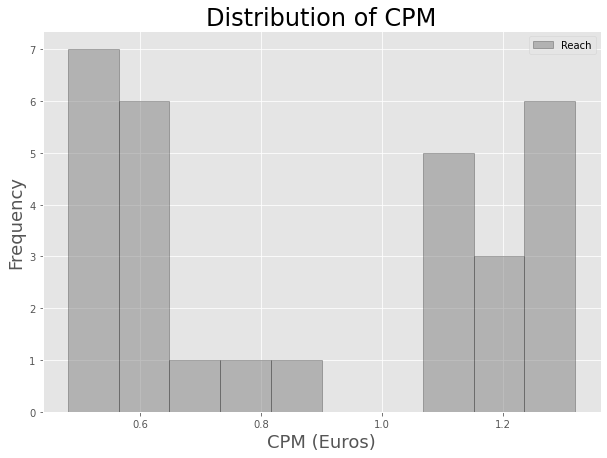

In [ ]:

# histogram 

#df[df['Obiettivo'] == 'POST_ENGAGEMENT'].CPM.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
#df[df['Obiettivo'] == 'VIDEO_VIEWS'].CPM.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Obiettivo'] == 'REACH'].CPM.plot(kind='hist', color='grey', edgecolor='black', alpha=0.5, figsize=(10, 7))

plt.legend(labels=[#'Engagement', 'Video Views',
                   'Reach'])
plt.title('Distribution of CPM', size=24)
plt.xlabel('CPM (Euros)', size=18)
plt.ylabel('Frequency', size=18);

In [ ]:
# Descriptive statistics engagement
statistics_obiettivo_eng = df[df['Obiettivo'] == 'POST_ENGAGEMENT'].describe()
statistics_obiettivo_eng.rename(columns=lambda x: x + '_engagement', inplace=True)
statistics_obiettivo_eng
statistics_obiettivo_eng[['IR%_engagement', 'CPM_engagement']]

,IR%_engagement,CPM_engagement
count,28.000000,29.000000
mean,0.082621,2.821558
std,0.134175,2.061514
min,0.008345,0.000000
25%,0.013199,1.538028
50%,0.032555,2.251341
75%,0.083751,3.610541
max,0.541667,9.282357


In [ ]:

# Descriptive statistics Video Views
statistics_views = df[df['Obiettivo'] == 'VIDEO_VIEWS'].describe()
statistics_views.rename(columns=lambda x: x + '_video_views', inplace=True)
statistics_views[['IR%_video_views', 'CPM_video_views']]

,IR%_video_views,CPM_video_views
count,654.000000,674.000000
mean,0.346976,1.773103
std,0.140675,1.923714
min,0.031250,0.000000
25%,0.247514,0.658256
50%,0.342225,1.252272
75%,0.428962,2.122086
max,1.000000,12.259961


In [ ]:

# Descriptive statistics REACH
statistics_reach = df[df['Obiettivo'] == 'REACH'].describe()
statistics_reach.rename(columns=lambda x: x + '_Reach', inplace=True)
statistics_reach[['IR%_Reach', 'CPM_Reach']]


,IR%_Reach,CPM_Reach
count,30.000000,30.000000
mean,0.062645,0.882093
std,0.036396,0.326627
min,0.000225,0.480946
25%,0.055760,0.576697
50%,0.065427,0.833135
75%,0.087966,1.187778
max,0.124115,1.320044


In [ ]:
general_statistics= df.describe()
general_statistics.rename(columns=lambda x: x + '_General', inplace=True)
general_statistics[['IR%_General', 'CPM_General', 'Impression_General']]

,IR%_General,CPM_General,Impression_General
count,712.000000,733.000000,733.000000
mean,0.324600,1.778117,21730.941337
std,0.156763,1.909253,50030.142255
min,0.000225,0.000000,2.000000
25%,0.222184,0.657895,197.000000
50%,0.330786,1.255864,3101.000000
75%,0.423506,2.122377,22891.000000
max,1.000000,12.259961,583607.000000


CI

In [ ]:
from numpy.ma.core import sqrt
IGFB_Countries_medie=pd.DataFrame()
IGFB_Countries_std=pd.DataFrame()

IGFB_Countries_medie['Media CPM']= pd.DataFrame(df[['CPM', 'Country']].groupby(['Country']).mean() )
IGFB_Countries_std['STD CPM']= pd.DataFrame(df[['CPM', 'Country']].groupby(['Country']).std() )


In [ ]:

countries_IGFB=pd.concat([IGFB_Countries_std,IGFB_Countries_medie],axis=1)
countries_IGFB.head()

,STD CPM,Media CPM
Country,,
BE,2.312842,2.470644
DE,2.045641,2.143163
ES,1.424492,1.446869
FR,1.475807,1.396283
IT,0.908409,1.027857


In [ ]:

#countries_IGFB.drop(columns='Average CPM', inplace=True)

#countries_IGFB['CAMPIONE_COUNTRY']=countries_IGFB.groupby('Country')['Media CPM'].transform('count')

#countries_IGFB['Lower CI']= countries_IGFB['Media CPM']-1.96*(countries_IGFB['STD CPM']/np.sqrt(countries_IGFB['CAMPIONE_COUNTRY']))
#countries_IGFB['Upper CI']= countries_IGFB['Media CPM']+1.96*(countries_IGFB['STD CPM']/np.sqrt(countries_IGFB['CAMPIONE_COUNTRY']))


In [ ]:
countries_IGFB

,STD CPM,Media CPM
Country,,
BE,2.312842,2.470644
DE,2.045641,2.143163
ES,1.424492,1.446869
FR,1.475807,1.396283
IT,0.908409,1.027857
PL,1.092056,1.175626
UK,2.466239,2.184067


**Test Shapiro-Wilk**

In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(general_statistics['Impression_General'])
print(shapiro_test)


(0.48872649669647217, 7.555420324933948e-06)


In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(general_statistics['CPM_General'])
print(shapiro_test)


(0.4288909435272217, 1.4098785641181166e-06)


In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(statistics_obiettivo_eng['CPM_engagement'])
print(shapiro_test)


(0.6436384916305542, 0.0005111116915941238)


In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(statistics_views['CPM_video_views'])
print(shapiro_test)


(0.42981433868408203, 1.4471976328422897e-06)


In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(statistics_reach['CPM_Reach'])
print(shapiro_test)


(0.4498675465583801, 2.547959866205929e-06)



**Scatter plots with Matplotlib and linear regression with Numpy**

In [ ]:
df['CPM_LOG']= np.log(df['CPM'])
df['BUDGET_LOG']= np.log(df['Importo speso (EUR)'])
df['BUDGET']= df['Importo speso (EUR)']


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'CPM LOG')

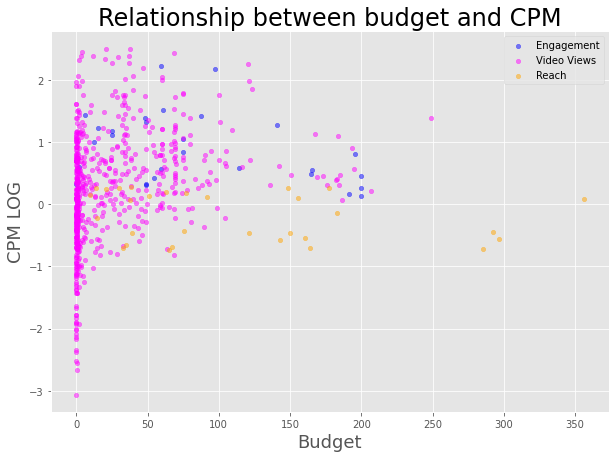

In [ ]:
# Scatter plot of Height and Weight

ax1 = df[df['Obiettivo'] == 'POST_ENGAGEMENT'].plot(kind='scatter', x='Importo speso (EUR)', y='CPM_LOG', color='blue', alpha=0.5, figsize=(10, 7))
df[df['Obiettivo'] == 'VIDEO_VIEWS'].plot(kind='scatter', x='Importo speso (EUR)', y='CPM_LOG', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
df[df['Obiettivo'] == 'REACH'].plot(kind='scatter', x='Importo speso (EUR)', y='CPM_LOG', color='orange', alpha=0.5, figsize=(10 ,7), ax=ax1)



plt.legend(labels=['Engagement', 'Video Views', 'Reach'])
plt.title('Relationship between budget and CPM', size=24)
plt.xlabel('Budget', size=18)
plt.ylabel('CPM LOG', size=18)

Text(0, 0.5, 'CPM')

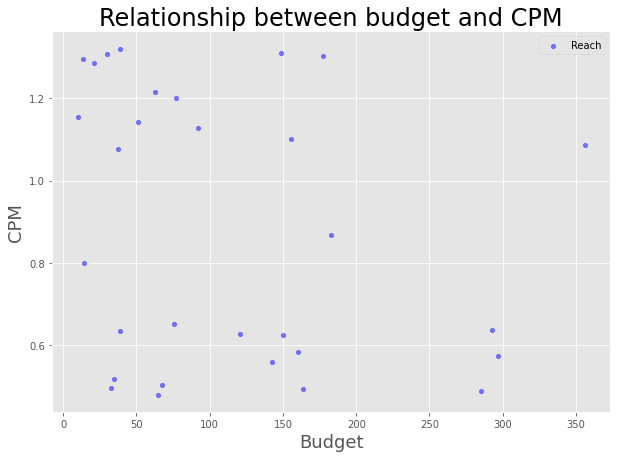

In [ ]:
# Scatter plot of Height and Weight

ax1 = df[df['Obiettivo'] == 'REACH'].plot(kind='scatter', x='BUDGET', y='CPM', color='blue', alpha=0.5, figsize=(10, 7))
#df[df['Obiettivo'] == 'VIDEO_VIEWS'].plot(kind='scatter', x='Importo speso (EUR)', y='CPM_LOG', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
#df[df['Obiettivo'] == 'REACH'].plot(kind='scatter', x='Importo speso (EUR)', y='CPM_LOG', color='orange', alpha=0.5, figsize=(10 ,7), ax=ax1)



plt.legend(labels=['Reach'])
plt.title('Relationship between budget and CPM', size=24)
plt.xlabel('Budget', size=18)
plt.ylabel('CPM', size=18)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


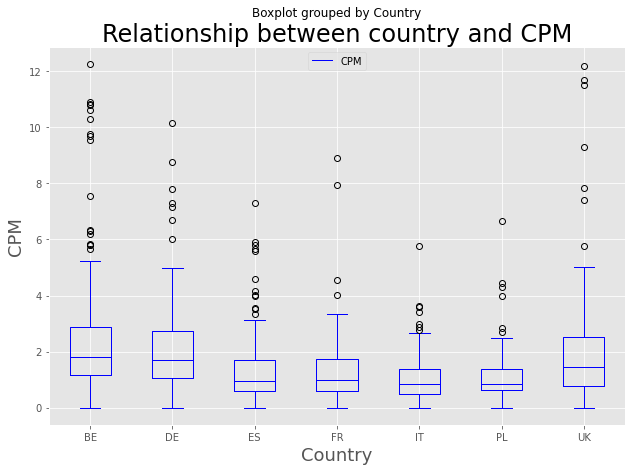

In [ ]:
# Scatter plot
ax1 = df[['CPM', 'Country']].boxplot( by='Country', color='blue', figsize=(10, 7))



plt.legend(labels=['CPM'])
plt.title('Relationship between country and CPM', size=24)
plt.xlabel('Country', size=18)
plt.ylabel('CPM', size=18);

In [ ]:
# Scatter plot
#ax1 = df[['CPM', 'placement']].boxplot( by='placement', color='blue', figsize=(10, 7))



#plt.legend(labels=['CPM'])
#plt.title('Relationship between channel and CPM', size=24)
#plt.xlabel('Channel', size=18)
#plt.ylabel('CPM', size=18);

In [ ]:
#df['Channel']=df.placement.copy()

In [ ]:
df.shape

(733, 45)

In [ ]:
if 'Channel' in list(set(df.columns)):
  df['Channel']=df['Channel'].str.replace('FBIG','FB')

In [ ]:
df['Channel']=df['Piattaforma']

In [ ]:
df.columns

Index(['obj.', 'mese', 'topic', 'formato', 'placement', 'country',
       'Nome del gruppo di inserzioni', 'Nome dell'inserzione', 'Obiettivo',
       'Nome della campagna', 'Piattaforma', 'Stato di pubblicazione',
       'Livello di pubblicazione', 'Tipo di risultato', 'Risultati',
       'Copertura', 'Impression', 'Costo per risultato', 'Importo speso (EUR)',
       'Clic unici sul link', 'Visualizzazioni della pagina di destinazione',
       'Clic sul link',
       'Costo per visualizzazione della pagina di destinazione',
       'Interazioni con il post', 'Riproduzioni del video di 3 secondi',
       'Riproduzioni del video al 25%', 'Riproduzioni del video al 50%',
       'Riproduzioni del video al 75%', 'Riproduzioni del video al 95%',
       'Riproduzioni del video al 100%', 'Reazioni ai post',
       'Condivisioni dei post', 'Commenti ai post', '"Mi piace" sulla Pagina',
       'Clic (tutti)', 'Inizio dei report', 'Fine dei report', 'IR%',
       'Country', 'Tipologia', 'Channel'

In [ ]:

df2=df.loc[df['Obiettivo'].str.contains('REACH', na=False)]
df2['CPM'].describe()

count    30.000000
mean      0.882093
std       0.326627
min       0.480946
25%       0.576697
50%       0.833135
75%       1.187778
max       1.320044
Name: CPM, dtype: float64

In [ ]:
list(set(df['Obiettivo']))

['VIDEO_VIEWS', 'REACH', 'POST_ENGAGEMENT']

In [ ]:
list(set(df['Tipologia']))

['Static', 'Video']

In [ ]:
# qui download
df_download=pd.DataFrame()

df2=df
df2=df.loc[df['Obiettivo'].str.contains('POST_ENGAGEMENT', na=False)]

df2=df.loc[df['Tipologia'].str.contains('Static', na=False)]

for i in list(set(df2.Country)):
  print(i)
  print(df2.loc[df2.Country==i][['IR%', 'Channel']].groupby(['Channel'])["IR%"].describe(percentiles=[.4, .6]) )
  print(" ")
  df2.loc[df2.Country==i][['IR%', 'Channel','Tipologia']].groupby(['Channel'])['IR%'].describe(percentiles=[.4, .6]).to_excel(str(i)+"_IR_MEDIA_ENGAGEMENT_NO-AN_FB-IG"+".xlsx")
  from google.colab import files
  files.download(str(i)+"_IR_MEDIA_ENGAGEMENT_NO-AN_FB-IG"+".xlsx") 

DE
           count      mean       std       min       40%       50%       60%  \
Channel                                                                        
facebook     2.0  0.033656  0.028906  0.013217  0.029568  0.033656  0.037744   
instagram    1.0  0.108287       NaN  0.108287  0.108287  0.108287  0.108287   

                max  
Channel              
facebook   0.054095  
instagram  0.108287  
 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FR
           count      mean       std       min       40%       50%       60%  \
Channel                                                                        
facebook     2.0  0.027764  0.018235  0.014870  0.025185  0.027764  0.030343   
instagram    1.0  0.089801       NaN  0.089801  0.089801  0.089801  0.089801   

                max  
Channel              
facebook   0.040658  
instagram  0.089801  
 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

UK
           count      mean  std       min       40%       50%       60%  \
Channel                                                                   
facebook     1.0  0.018855  NaN  0.018855  0.018855  0.018855  0.018855   
instagram    1.0  0.101536  NaN  0.101536  0.101536  0.101536  0.101536   

                max  
Channel              
facebook   0.018855  
instagram  0.101536  
 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PL
           count      mean  std       min       40%       50%       60%  \
Channel                                                                   
instagram    1.0  0.083243  NaN  0.083243  0.083243  0.083243  0.083243   

                max  
Channel              
instagram  0.083243  
 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

IT
           count      mean       std       min       40%       50%       60%  \
Channel                                                                        
facebook     2.0  0.027573  0.024044  0.010572  0.024173  0.027573  0.030973   
instagram    1.0  0.048298       NaN  0.048298  0.048298  0.048298  0.048298   

                max  
Channel              
facebook   0.044575  
instagram  0.048298  
 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BE
           count      mean       std       min       40%       50%       60%  \
Channel                                                                        
facebook     4.0  0.023749  0.010293  0.013145  0.019749  0.024264  0.028780   
instagram    1.0  0.071869       NaN  0.071869  0.071869  0.071869  0.071869   

                max  
Channel              
facebook   0.033320  
instagram  0.071869  
 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ES
           count      mean  std       min       40%       50%       60%  \
Channel                                                                   
facebook     1.0  0.017327  NaN  0.017327  0.017327  0.017327  0.017327   
instagram    1.0  0.085275  NaN  0.085275  0.085275  0.085275  0.085275   

                max  
Channel              
facebook   0.017327  
instagram  0.085275  
 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Scatter plot
df_download=pd.DataFrame()
df2=df.copy()

for i in list(set(df.Country)):
  print(i)
  print(df.loc[df.Country==i][['IR%', 'Channel', 'Country']].groupby(['Channel'])['IR%'].describe(percentiles=[.4, .6]) )
  df.loc[df.Country==i][['IR%', 'Channel', 'Country']].groupby(['Channel'])['IR%'].describe(percentiles=[.4, .6] ).to_excel('2IR_FBIG_download'+str(i)+".xlsx")
  from google.colab import files
  files.download('2IR_FBIG_download'+str(i)+".xlsx") 
 

BE


KeyError: ignored

In [ ]:
df_download

""


In [ ]:
# Scatter plot
for i in list(set(df.Country)):
  ax1 = df.loc[df.Country==i][['CPM', 'Channel']].boxplot( by='Channel', color='blue', figsize=(10, 7))
  plt.legend(labels=['CPM'])
  plt.title('Relationship between country and CPM in '+str(i), size=24)
  plt.xlabel('Country', size=18)
  plt.ylabel('CPM', size=18);

KeyError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


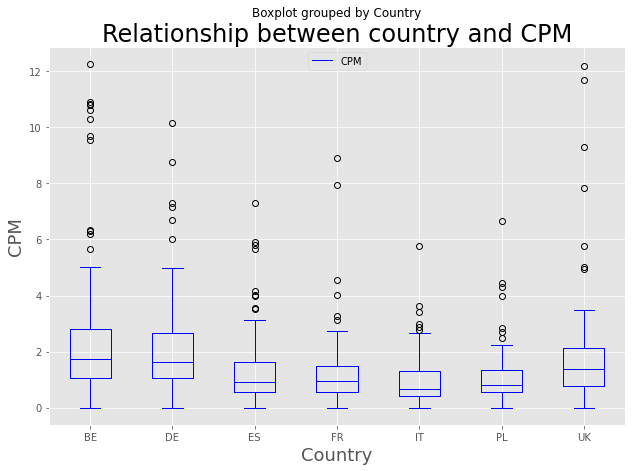

In [ ]:
# Scatter plot
ax1 = df[['CPM', 'Country']].boxplot( by='Country', color='blue', figsize=(10, 7))



plt.legend(labels=['CPM'])
plt.title('Relationship between country and CPM', size=24)
plt.xlabel('Country', size=18)
plt.ylabel('CPM', size=18);

In [ ]:
# Scatter plot
ax1 = df[['CPM', 'Giorni ON']].boxplot( by='Giorni ON', color='blue', figsize=(10, 7))



plt.legend(labels=['CPM'])
plt.title('Relationship between days on and CPM', size=24)
plt.xlabel('days on', size=18)
plt.ylabel('CPM', size=18);

KeyError: ignored

In [ ]:

df=df_original


# Scatter plot
ax1 = df.loc[df['Obiettivo']=="REACH"][['CPM', 'Giorni ON']].boxplot( by='Giorni ON', color='blue', figsize=(10, 7))



plt.legend(labels=['CPM'])
plt.title('Relationship between days on and CPM obiettivo REACH', size=24)
plt.xlabel('days on', size=18)
plt.ylabel('CPM', size=18);

Numero post vs CPM

In [ ]:
df=df_original
df['numero post'] = df.groupby('anno mese')['anno mese'].transform('count')

# Scatter plot
ax1 = df[['CPM', 'numero post']].boxplot( by='numero post', color='blue', figsize=(10, 7))



plt.legend(labels=['CPM'])
plt.title('Relationship number of posts and CPM', size=24)
plt.xlabel('n post', size=18)
plt.ylabel('CPM', size=18);

NameError: ignored

In [ ]:
df=df_original

df=df.loc[df['Obiettivo']=='REACH']
df['numero post'] = df.groupby('anno mese')['anno mese'].transform('count')

# Scatter plot
ax1 = df[['CPM', 'numero post']].boxplot( by='numero post', color='blue', figsize=(10, 7))



plt.legend(labels=['CPM'])
plt.title('Relationship between monthly number of posts and CPM obiettivo REACH', size=12)
plt.xlabel('n post', size=18)
plt.ylabel('CPM', size=18);

NameError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


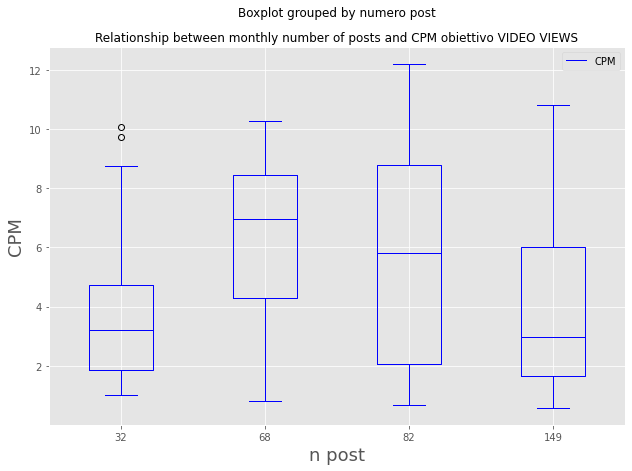

In [ ]:
df=df_original

df=df.loc[df['Obiettivo']=='VIDEO_VIEWS']
df['numero post'] = df.groupby('anno mese')['anno mese'].transform('count')

# Scatter plot
ax1 = df[['CPM', 'numero post']].boxplot( by='numero post', color='blue', figsize=(10, 7))



plt.legend(labels=['CPM'])
plt.title('Relationship between monthly number of posts and CPM obiettivo VIDEO VIEWS', size=12)
plt.xlabel('n post', size=18)
plt.ylabel('CPM', size=18);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


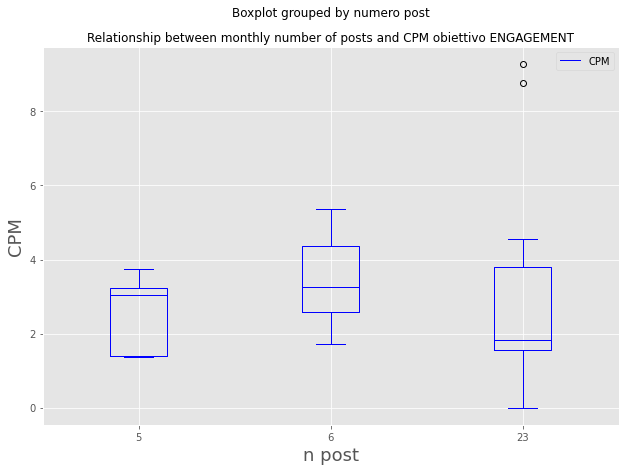

In [ ]:
df=df_original

df=df.loc[df['Obiettivo']=='POST_ENGAGEMENT']
df['numero post'] = df.groupby('anno mese')['anno mese'].transform('count')

# Scatter plot
ax1 = df[['CPM', 'numero post']].boxplot( by='numero post', color='blue', figsize=(10, 7))



plt.legend(labels=['CPM'])
plt.title('Relationship between monthly number of posts and CPM obiettivo ENGAGEMENT', size=12)
plt.xlabel('n post', size=18)
plt.ylabel('CPM', size=18);

In [ ]:
df=df_original


df[['CPM', 'numero post','Giorni ON']].corr()



,CPM,numero post,Giorni ON
CPM,1.00000,-0.090750,0.178510
numero post,-0.09075,1.000000,0.488519
Giorni ON,0.17851,0.488519,1.000000


In [ ]:
corr = df[['CPM', 'numero post','Giorni ON']].corr()

corr.style.background_gradient(cmap='Oranges')

In [ ]:
df=df.loc[df['Obiettivo']=='REACH']

df[['CPM',"IR%", 'numero post','Giorni ON','Copertura', 'Impression', 'Costo per risultato', 'Importo speso (EUR)',
       'Clic unici sul link', 'Visualizzazioni della pagina di destinazione',
       'Clic sul link',
       'Costo per visualizzazione della pagina di destinazione',
       'Interazioni con il post', 'Riproduzioni del video di 3 secondi',
       'Riproduzioni del video al 95%',
       'Riproduzioni del video al 100%', 'Reazioni ai post',
       'Condivisioni dei post', 'Commenti ai post', '"Mi piace" sulla Pagina']].corr()

,CPM,IR%,numero post,Giorni ON,Copertura,Impression,Costo per risultato,Importo speso (EUR),Interazioni con il post,Reazioni ai post,Condivisioni dei post,Commenti ai post
CPM,1.000000,0.217343,0.422843,-0.104933,-0.630595,-0.633891,0.998590,-0.353302,-0.461206,-0.517152,-0.072067,0.196311
IR%,0.217343,1.000000,0.050393,0.226654,0.030481,0.031825,0.219634,0.161285,0.448023,0.262521,0.626914,0.073346
numero post,0.422843,0.050393,1.000000,-0.763763,-0.490666,-0.487328,0.427125,-0.466624,-0.431425,0.166287,0.466400,0.615157
Giorni ON,-0.104933,0.226654,-0.763763,1.000000,0.618795,0.616613,-0.110113,0.721744,0.645465,-0.029012,-0.342997,-0.479497
Copertura,-0.630595,0.030481,-0.490666,0.618795,1.000000,0.999816,-0.639873,0.898598,0.885731,0.447522,-0.186676,-0.306809
Impression,-0.633891,0.031825,-0.487328,0.616613,0.999816,1.000000,-0.642631,0.897759,0.887606,0.456453,-0.181702,-0.297213
Costo per risultato,0.998590,0.219634,0.427125,-0.110113,-0.639873,-0.642631,1.000000,-0.366022,-0.469576,-0.510627,-0.068476,0.222632
Importo speso (EUR),-0.353302,0.161285,-0.466624,0.721744,0.898598,0.897759,-0.366022,1.000000,0.888717,0.319014,-0.189022,-0.163431
Interazioni con il post,-0.461206,0.448023,-0.431425,0.645465,0.885731,0.887606,-0.469576,0.888717,1.000000,0.558155,0.168482,-0.181446
Reazioni ai post,-0.517152,0.262521,0.166287,-0.029012,0.447522,0.456453,-0.510627,0.319014,0.558155,1.000000,0.780405,0.415301


In [ ]:
corr=df[['CPM',"IR%", 'numero post','Giorni ON','Copertura', 'Impression', 'Costo per risultato', 'Importo speso (EUR)',
       'Clic unici sul link', 'Visualizzazioni della pagina di destinazione',
       'Clic sul link',
       'Costo per visualizzazione della pagina di destinazione',
       'Interazioni con il post', 'Riproduzioni del video di 3 secondi',
       'Riproduzioni del video al 95%',
       'Riproduzioni del video al 100%', 'Reazioni ai post',
       'Condivisioni dei post', 'Commenti ai post', '"Mi piace" sulla Pagina']].corr()

corr_exel= corr.style.background_gradient(cmap='Oranges') 
corr_exel.to_excel('correl.xlsx')
from google.colab import files
files.download('correl.xlsx') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df=df_original


**best fit polynomials**

In [ ]:
import numpy as np

# best fit polynomials

df_reach = df[df['Obiettivo'] == 'REACH']
df_video_views = df[df['Obiettivo'] == 'VIDEO_VIEWS']
df_engagement= df[df['Obiettivo'] == 'POST_ENGAGEMENT']





In [ ]:

# polynomial - REACH
reach_fit = np.polyfit( df_reach['Importo speso (EUR)'], df_reach.CPM, 1)
reach_fit


In [ ]:
# polynomial - VV
video_views_fit = np.polyfit(df_video_views['Importo speso (EUR)'], df_video_views.CPM, 1)
video_views_fit

In [ ]:

# polynomial - ENGAGEMENT
egnagement_fit = np.polyfit(df_engagement['Importo speso (EUR)'],df_engagement.CPM, 1)
egnagement_fit

The following plot depicts the scatter plots as well as the previous regression lines

In [ ]:
# scatter plots and regression lines
ax1 = df[df['Obiettivo'] == 'POST_ENGAGEMENT'].plot(kind='scatter', x='Importo speso (EUR)', y='CPM', color='blue', alpha=0.5, figsize=(10, 7))
df[df['Obiettivo'] == 'VIDEO_VIEWS'].plot(kind='scatter', x='Importo speso (EUR)', y='CPM', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
df[df['Obiettivo'] == 'REACH'].plot(kind='scatter', x='Importo speso (EUR)', y='CPM', color='orange', alpha=0.5, figsize=(10 ,7), ax=ax1)

# regression lines
plt.plot(df_reach.CPM, reach_fit[0] * df_reach.CPM + reach_fit[1], color='darkblue', linewidth=2)
plt.plot(df_video_views.CPM, video_views_fit[0] * df_video_views.CPM + video_views_fit[1], color='deeppink', linewidth=2)
plt.plot(df_engagement.CPM, egnagement_fit[0] * df_engagement.CPM + egnagement_fit[1], color='orange', linewidth=2)

# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(reach_fit[1], reach_fit[0]), color='darkblue', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(video_views_fit[1], video_views_fit[0]), color='deeppink', size=12)
plt.text(60, 330, 'y={:.2f}+{:.2f}*x'.format(egnagement_fit[1], egnagement_fit[0]), color='orange', size=12)

# legend, title and labels.
#plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
#plt.title('Relationship between Height and Weight', size=24)
#plt.xlabel('Height (inches)', size=18)
#plt.ylabel('Weight (pounds)', size=18);

**Multiple linear regression**


encoding categorical variable

In [ ]:
df.columns
#mese, channel, post/stories, Tipologia, Tipologia

In [ ]:
df_original=pd.get_dummies(df_original, columns= {"mese", "Channel", "post/stories", "Tipologia", "Obiettivo", 'feed/dark'})

In [ ]:
list(set(df.columns))


Calculate number of posts that month and use it as a variable

In [ ]:
df_original['numero post'] = df_original.groupby('anno mese')['anno mese'].transform('count')

**We can use this dataframe to obtain a multiple linear regression model using Scikit-learn**

In [ ]:
df_original.columns

In [ ]:
from sklearn.linear_model import LinearRegression

# create linear regression object
mlr = LinearRegression()

# fit linear regression
mlr.fit(df_original[["Channel_IG",

            "Tipologia_Static", 
            'numero post',
            'Obiettivo_REACH',
            'feed/dark_Dark',
            'budget medio'
       
            ]], df_original['CPM medio'])


In [ ]:

# get the slope and intercept of the line best fit.
print(mlr.intercept_)

In [ ]:

print(mlr.coef_)


In [ ]:
# fit linear regression
m1=mlr.fit(df_original[["Channel_IG",

            "Tipologia_Static", 
            'numero post',
            'Obiettivo_REACH',
            'feed/dark_Dark',
            'budget medio'
       
            ]], df_original['CPM medio'])

In [ ]:
m1.coef_

In [ ]:
import statsmodels.api as sm
from scipy import stats

df=df_original


df=df.loc[df['Obiettivo']=='REACH']
df['numero post'] = df.groupby('anno mese')['anno mese'].transform('count')
df=pd.get_dummies(df, columns= {"mese", "Channel", "post/stories", "Tipologia", "Obiettivo", 'feed/dark'})


In [ ]:
for i in list(set(df.columns)):
  if 'feed' in i:
    print(i)

In [ ]:

X = df[[
            "Channel_IG",

            "Tipologia_Static", 
            'numero post',
            'Obiettivo_REACH',
            'feed/dark_Dark',
            'budget medio'

                        ]]
y = df['CPM medio']


Calcolo influenza IR

In [ ]:
df_original['IR medio']=df_original.groupby(['anno mese'])['IR%'].transform('mean')

In [ ]:

X = df[[
            "Channel_IG",

            "Tipologia_Static", 
            'numero post',
            'Obiettivo_REACH',
            'feed/dark_Dark',
            'Giorni ON',
            'budget medio'

                        ]]
y = df['CPM medio']


In [ ]:
n=len(df)

# use scikit-learn's linear regression model to obtain the coefficient estimates
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)




beta_hat = [reg.intercept_] + reg.coef_.tolist()
beta_hat

# compute the p-values
from scipy.stats import t
# add ones column
X1 = np.column_stack((np.ones(n), X))
# standard deviation of the noise.
sigma_hat = np.sqrt(np.sum(np.square(y - X1@beta_hat)) / (n - X1.shape[1]))
# estimate the covariance matrix for beta 
beta_cov = np.linalg.inv(X1.T@X1)
# the t-test statistic for each variable from the formula from above figure
t_vals = beta_hat / (sigma_hat * np.sqrt(np.diagonal(beta_cov)))
# compute 2-sided p-values.
p_vals = t.sf(np.abs(t_vals), n-X1.shape[1])*2 
#t_vals


reg.coef_

Intercetta, "Channel_IG",  "Tipologia_Static",   'numero post', 'Obiettivo_REACH',  'Giorni ON'




In [ ]:
p_vals 


In [ ]:
n=len(df)

# use scikit-learn's linear regression model to obtain the coefficient estimates
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)




beta_hat = [reg.intercept_] + reg.coef_.tolist()
beta_hat

# compute the p-values
from scipy.stats import t
# add ones column
X1 = np.column_stack((np.ones(n), X))
# standard deviation of the noise.
sigma_hat = np.sqrt(np.sum(np.square(y - X1@beta_hat)) / (n - X1.shape[1]))
# estimate the covariance matrix for beta 
beta_cov = np.linalg.inv(X1.T@X1)
# the t-test statistic for each variable from the formula from above figure
t_vals = beta_hat / (sigma_hat * np.sqrt(np.diagonal(beta_cov)))
# compute 2-sided p-values.
p_vals = t.sf(np.abs(t_vals), n-X1.shape[1])*2 
#t_vals


reg.coef_

Intercetta, "Channel_IG",  "Tipologia_Static",   'numero post', 'Obiettivo_REACH',  'Giorni ON'




In [ ]:
p_vals 


In [ ]:
df=df_original


df['numero post'] = df.groupby('anno mese')['anno mese'].transform('count')
df=pd.get_dummies(df, columns= {"mese", "Channel", "post/stories", "Tipologia", "Obiettivo", 'feed/dark'})


In [ ]:

X = df[[    "Channel_IG",
            "Tipologia_Static", 
            'numero post',

            'Giorni ON'

                        ]]
y = df.CPM


In [ ]:
n=len(df)

# use scikit-learn's linear regression model to obtain the coefficient estimates
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)




beta_hat = [reg.intercept_] + reg.coef_.tolist()
beta_hat

# compute the p-values
from scipy.stats import t
# add ones column
X1 = np.column_stack((np.ones(n), X))
# standard deviation of the noise.
sigma_hat = np.sqrt(np.sum(np.square(y - X1@beta_hat)) / (n - X1.shape[1]))
# estimate the covariance matrix for beta 
beta_cov = np.linalg.inv(X1.T@X1)
# the t-test statistic for each variable from the formula from above figure
t_vals = beta_hat / (sigma_hat * np.sqrt(np.diagonal(beta_cov)))
# compute 2-sided p-values.
p_vals = t.sf(np.abs(t_vals), n-X1.shape[1])*2 
#t_vals


reg.coef_

In [ ]:
p_vals 
